Repeat KNN algorithm process with stratified sampling

In [7]:
#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
#data imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_cleaner(df):
    data = df.copy()
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

##### New way to generate the data

def data_generator(df):
    '''
    input:
        df: dataframe to split stratified by variable class
        class: string with variable to use as response and as variable to stratify by
    output:
        X_train, y_train: variables and response 60% data 
        X_val, y_val: variables and response 20% data 
        X_trainval, y_trainval: variables and response 80% data (for cross validation)
        X_test, y_test: variables and response 20% data 
    '''
    
    X = df.drop(["class2","class4"], axis=1)
    y = df['class4']
    
    # 60%, 20%, 20%
    # Generate TrainVal 80% and test 20% 
    X_trainval, X_test, y_trainval, y_test = train_test_split( X, y, test_size=0.20, random_state=42, stratify=y)
    
    # Furthermore split train into Train and Val
    X_train, X_val, y_train, y_val= train_test_split( X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval)
    
    return X_train, X_val, X_trainval, X_test, y_train, y_val, y_trainval, y_test


def convert_binary(y):
    '''
    Parameters
    ----------
    y : repsonse variable with 4 classes
    Returns
    -------
    y : reponse variable 2 classes
    '''
    y_bin = np.where(y == "nonevent", "nonevent","event")
    return y_bin

url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
df = pd.read_csv(url)
df = data_cleaner(df)


X_train, X_val, X_trainval, X_test, y_train, y_val, y_trainval, y_test = data_generator(df)

# If needed conversion from 4 classes to binary classes
y_train_bin = convert_binary(y_train)
y_val_bin = convert_binary(y_val)
y_trainval_bin = convert_binary(y_trainval)
y_test_bin = convert_binary(y_test)



rate of correct predictions for k = 1 0.9038461538461539
rate of correct predictions for k = 2 0.7884615384615384
rate of correct predictions for k = 3 0.7692307692307693
rate of correct predictions for k = 4 0.7692307692307693
rate of correct predictions for k = 5 0.8461538461538461
rate of correct predictions for k = 6 0.8076923076923077
rate of correct predictions for k = 7 0.8461538461538461
rate of correct predictions for k = 8 0.8269230769230769
rate of correct predictions for k = 9 0.7884615384615384
rate of correct predictions for k = 10 0.8269230769230769
rate of correct predictions for k = 11 0.7884615384615384
rate of correct predictions for k = 12 0.8076923076923077
rate of correct predictions for k = 13 0.8076923076923077
rate of correct predictions for k = 14 0.7884615384615384
rate of correct predictions for k = 15 0.8076923076923077
rate of correct predictions for k = 16 0.8076923076923077
rate of correct predictions for k = 17 0.8461538461538461
rate of correct predict

(1.0, 40.0)

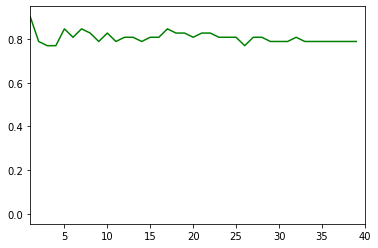

In [10]:
#set up for storing error rate
pred_rate = np.zeros(40)

#find error rate on the validation set 
for k in range(1,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    #fit to training data
    knn.fit(X_train, y_train_bin) 
    #predicted values for class2 on validation set
    y_pred_val_bin = knn.predict(X_val)
    #compare predictions with actual results
    pred_rate[k] = metrics.accuracy_score(y_val_bin, y_pred_val_bin)
    print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="green")
ax.set_xlim(1, 40)

multiclass accuracy for 3-NN on test set= 0.75


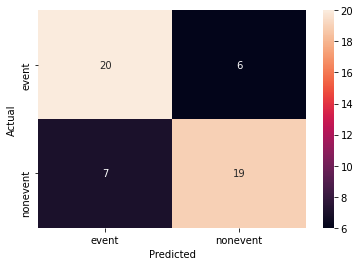

In [15]:
#k=3 
#run on test set 

knn = KNeighborsClassifier(n_neighbors=3) 
#fit with optimum k to training data
knn.fit(X_train, y_train_bin) 

y_pred_test = knn.predict(X_test)

print('multiclass accuracy for 3-NN on test set=', metrics.accuracy_score(y_test_bin, y_pred_test))

#map predictions on heat map
confusion_matrix = pd.crosstab(y_test_bin, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


rate of correct predictions for k = 1 0.6153846153846154
rate of correct predictions for k = 2 0.5192307692307693
rate of correct predictions for k = 3 0.5769230769230769
rate of correct predictions for k = 4 0.6153846153846154
rate of correct predictions for k = 5 0.5961538461538461
rate of correct predictions for k = 6 0.6153846153846154
rate of correct predictions for k = 7 0.5769230769230769
rate of correct predictions for k = 8 0.6153846153846154
rate of correct predictions for k = 9 0.6538461538461539
rate of correct predictions for k = 10 0.6923076923076923
rate of correct predictions for k = 11 0.6153846153846154
rate of correct predictions for k = 12 0.5961538461538461
rate of correct predictions for k = 13 0.5961538461538461
rate of correct predictions for k = 14 0.5769230769230769
rate of correct predictions for k = 15 0.5769230769230769
rate of correct predictions for k = 16 0.5576923076923077
rate of correct predictions for k = 17 0.5576923076923077
rate of correct predict

(1.0, 40.0)

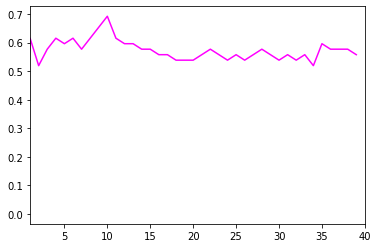

In [3]:
#set up for storing error rate
pred_rate = np.zeros(40)

#find error rate on the validation set 
for k in range(1,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    #fit to training data
    knn.fit(X_train, y_train) 
    #predicted values for class2 on validation set
    y_pred_val = knn.predict(X_val)
    #compare predictions with actual results
    pred_rate[k] = metrics.accuracy_score(y_val, y_pred_val)
    print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="fuchsia")
ax.set_xlim(1, 40)

multiclass accuracy for 34-NN on test set= 0.5


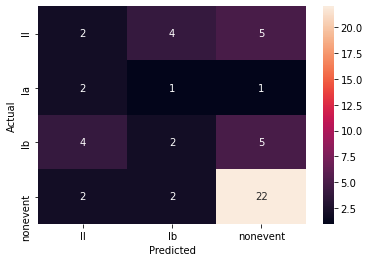

In [ ]:
#k=34 gives lowest error
#run on test set

knn = KNeighborsClassifier(n_neighbors=34) 
#fit with optimum k to training data
knn.fit(X_train, y_train) 

y_pred_test = knn.predict(X_test)

print('multiclass accuracy for 34-NN on test set=', metrics.accuracy_score(y_test, y_pred_test))

#map predictions on heat map
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

(1.0, 40.0)

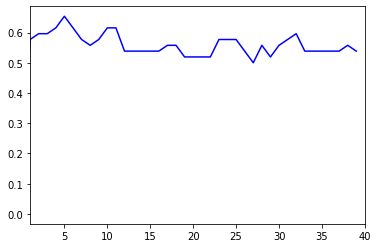

In [23]:
#normalised x data

from sklearn.preprocessing import StandardScaler
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)
X_val_norm = StandardScaler().fit_transform(X_val)

#repeat 
#set up for storing error rate
pred_rate = np.zeros(40)

#find error rate on the validation set 
for k in range(1,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    #fit to training data
    knn.fit(X_train_norm, y_train) 
    #predicted values for class2 on validation set
    y_pred_val = knn.predict(X_val_norm)
    #compare predictions with actual results
    pred_rate[k] = metrics.accuracy_score(y_val, y_pred_val)
    #print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="blue")
ax.set_xlim(1, 40)


multiclass accuracy for 27-NN on test set= 0.5576923076923077


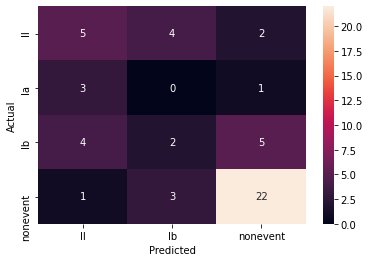

In [25]:
#k=27

knn = KNeighborsClassifier(n_neighbors=27) 
#fit with optimum k to training data
knn.fit(X_train_norm, y_train) 

y_pred_test = knn.predict(X_test_norm)

print('multiclass accuracy for 27-NN on test set=', metrics.accuracy_score(y_test, y_pred_test))

#map predictions on heat map
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)